# Implemention for Batch, Mini-Batch and Stochastic Gradient Descent

#### Import numpy, matplotlib.pyplot and make it inline

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points,I generated a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [92]:
X = np.linspace(0,20)
a=-2
b=1
y = a*X+b

In [93]:
print(X)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.6734

#### Defining a function for Batch GD that takes the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1


In [94]:
def batch(input_data_x, target_labels_y, learning_rate, max_no_of_iterations):
    
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 1000
    m = len(input_data_x)
    actual_no_of_epochs = 1
    for i in range(max_no_of_iterations):
    

        hypothesis = theta0 + theta1 * input_data_x
        cost = (sum(hypothesis - target_labels_y)**2)/(2*m)
        gradient_0 = (sum(hypothesis - target_labels_y))/m
        gradient_1 = (sum(input_data_x*(hypothesis - target_labels_y)))/m
        theta0 = theta0 - learning_rate * gradient_0
        theta1 = theta1 - learning_rate * gradient_1
        gradient_vector = np.array([gradient_0, gradient_1])
        
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        losses.append(cost)
        
        #Stopping Conditions

        if norm(gradient_vector) <= 0.0001:
            break
        if abs(cost-cost_1) <= 0.0001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs
            



#### Testing the function

In [95]:
out_put = batch(X, y, 0.0001, 1000)
theta0_list = out_put[0]
theta1_list = out_put[1]
losses = out_put[2]
hypothesis_list = out_put[3]
theta0 = out_put[4]
theta1 = out_put[5]
no_of_epochs = out_put[6]
y_predicted = theta0 + theta1 * X
print(no_of_epochs)

722


####  r2 score

In [96]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_predicted)
print(r2)

0.9976654357582943


#### Plot loss vs. epochs

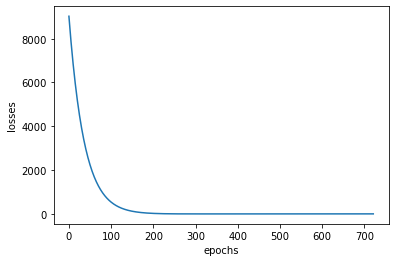

In [97]:
epochs_ = np.arange(0, no_of_epochs)
plt.plot(epochs_, losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

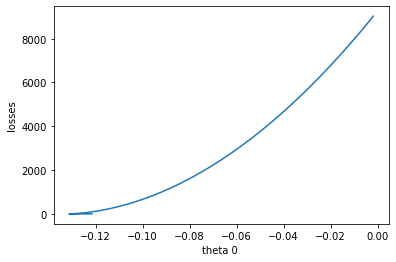

In [98]:
plt.plot(theta0_list, losses)
plt.xlabel("theta 0 ")
plt.ylabel("losses")
plt.show()

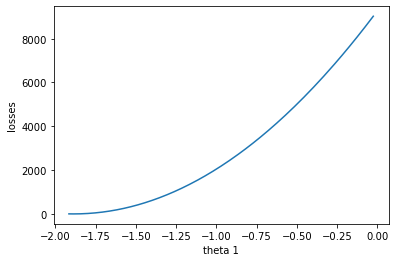

In [99]:
plt.plot(theta1_list, losses)
plt.xlabel("theta 1")
plt.ylabel("losses")
plt.show()

#### Plot all regression lines till converge

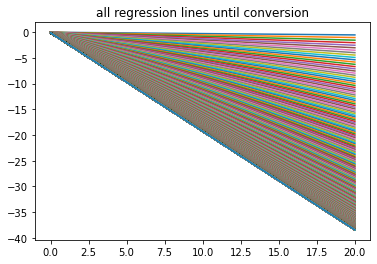

In [100]:
for w in range(no_of_epochs-1):
    line = hypothesis_list[w]
    plt.plot(X, line)
    
plt.title("all regression lines until conversion")    
plt.show()

In [101]:
print(hypothesis_list[0])

[-0.0019     -0.01248726 -0.02307451 -0.03366177 -0.04424902 -0.05483628
 -0.06542353 -0.07601079 -0.08659804 -0.0971853  -0.10777255 -0.11835981
 -0.12894706 -0.13953432 -0.15012157 -0.16070883 -0.17129608 -0.18188334
 -0.1924706  -0.20305785 -0.21364511 -0.22423236 -0.23481962 -0.24540687
 -0.25599413 -0.26658138 -0.27716864 -0.28775589 -0.29834315 -0.3089304
 -0.31951766 -0.33010491 -0.34069217 -0.35127943 -0.36186668 -0.37245394
 -0.38304119 -0.39362845 -0.4042157  -0.41480296 -0.42539021 -0.43597747
 -0.44656472 -0.45715198 -0.46773923 -0.47832649 -0.48891374 -0.499501
 -0.51008825 -0.52067551]


#### Plot the best regression line

In [102]:
best_fit = theta0 + theta1 *X

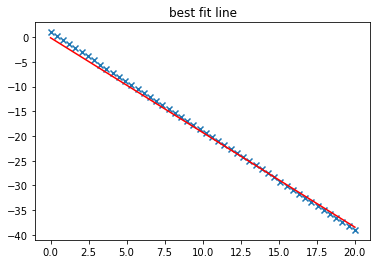

In [103]:
plt.plot(X, best_fit, c='red')
plt.scatter(X,y, marker= 'x')
plt.title('best fit line')
plt.show()

#### Trying different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and seeing the difference in output.

In [104]:
theta0_list_2, theta1_list_2, losses_2, hypothesis_list_2, theta0_2, theta1_2, no_of_epochs_2 = batch(X, y, 0.001, 500)

y_predicted_2 = theta0_2 + theta1_2 * X
print("number of epochs when learning rate is 0.001 is :")
print(no_of_epochs_2)

number of epochs when learning rate is 0.001 is :
74


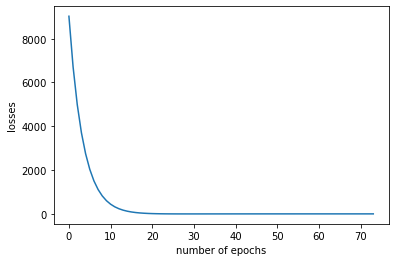

In [105]:
epochs__ = np.arange(0, no_of_epochs_2)
plt.plot(epochs__, losses_2)
plt.xlabel("number of epochs")
plt.ylabel("losses")
plt.show()

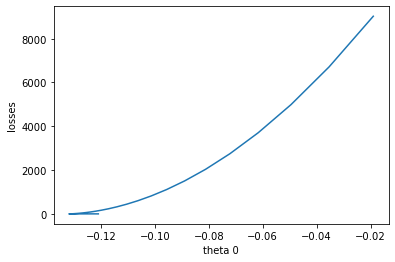

In [106]:
plt.plot(theta0_list_2, losses_2)
plt.xlabel("theta 0")
plt.ylabel("losses")
plt.show()

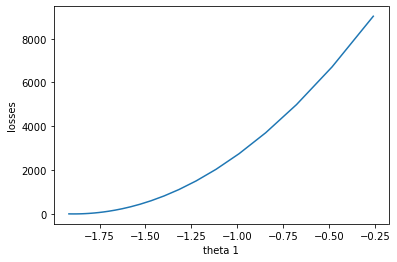

In [107]:
plt.plot(theta1_list_2, losses_2)
plt.xlabel("theta 1")
plt.ylabel("losses")
plt.show()

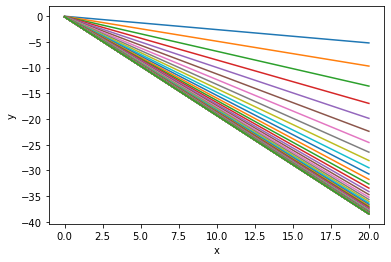

In [108]:
for q in range(no_of_epochs_2 -1):
    line_2 = hypothesis_list_2[q]
    plt.plot(X, line_2)
    
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [109]:
best_fit_2 = theta0_2 + theta1_2 *X

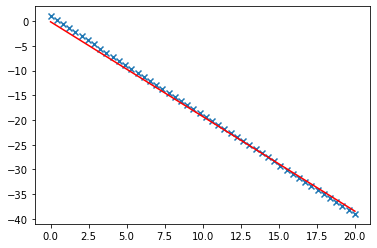

In [110]:
plt.plot(X, best_fit_2, c='red')
plt.scatter(X,y, marker= 'x')
plt.show()

# Mini-Batch

#### Updating the implementation of the Batch GD to be Mini-Batch 

In [111]:
from numpy.linalg import norm
def mini_batch(input_data_x, target_labels_y, learning_rate, max_no_of_iterations, no_of_mini_batches):
    cost_ii = 1000
    theta0 = 0
    theta1 = 0
    m = len(input_data_x)
    
    n = m // no_of_mini_batches # no of elements in each batch
    theta0_list = []
    theta1_list = []
    losses = []
    hypothesis_list = []
    actual_no_of_epochs = 0

    for p in range(max_no_of_iterations):

        for i in range(n):
            hypothesis = theta0 + theta1 * input_data_x[i*n:n*(i+1)]
            gradient_0 = (sum(hypothesis - target_labels_y[i*n:n*(i+1)]))/n
            gradient_1 = (sum(input_data_x[i*n:n*(i+1)]*(hypothesis - target_labels_y[i*n:n*(i+1)])))/n
            theta0 = theta0 - learning_rate * gradient_0
            theta1 = theta1 - learning_rate * gradient_1
            cost = (sum(hypothesis - target_labels_y[i*n:n*(i+1)])**2)/(2*n)
            theta0_list.append(theta0)
            theta1_list.append(theta1)
            losses.append(cost)
            

        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x 
        hypothesis_list.append(hypothesis)
        cost_i = (sum(hypothesis - target_labels_y)**2)/(2*n)
        gradient_vector = np.array([gradient_0, gradient_1])


        if abs(cost_i-cost_ii) <= 0.001:
            break;

        cost_ii = cost_i
        

    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 , actual_no_of_epochs
    
            



In [112]:
out_put_mini = mini_batch(X, y, 0.0001, 1000, 5)
theta0_list_mini = out_put_mini[0]
theta1_list_mini = out_put_mini[1]
losses_mini = out_put_mini[2]
hypothesis_list_mini = out_put_mini[3]
theta0_mini = out_put_mini[4]
theta1_mini = out_put_mini[5]
no_of_epochs_mini = out_put_mini[6]
y_pred_mini = theta0 + theta1 * X
print(no_of_epochs_mini)

149


#  r2 score

In [113]:
r2 = r2_score(y,y_pred_mini)
print(r2)

0.9976654357582943


# Plot loss vs. iterations

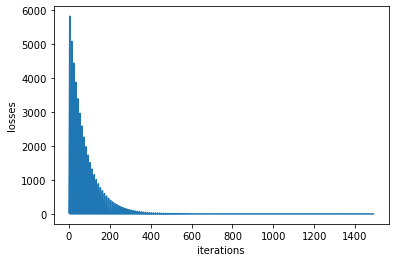

In [114]:
no_of_iterations = no_of_epochs_mini * 10
iter_1 = np.arange(0, no_of_iterations)
plt.plot(iter_1, losses_mini)
plt.xlabel('iterations')
plt.ylabel('losses')
plt.show()



# Plot Theta_0 vs. loss and Theta_1 vs. loss¶

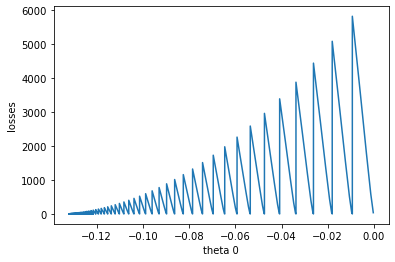

In [115]:
plt.plot(theta0_list_mini, losses_mini)
plt.xlabel('theta 0')
plt.ylabel('losses')
plt.show()

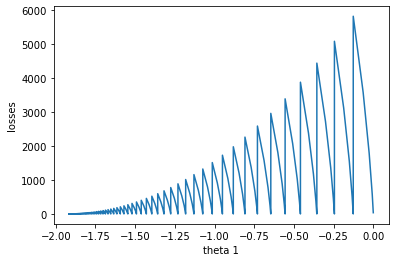

In [116]:
plt.plot(theta1_list_mini, losses_mini)
plt.xlabel("theta 1")
plt.ylabel("losses")
plt.show()

# All regression lines until conversion

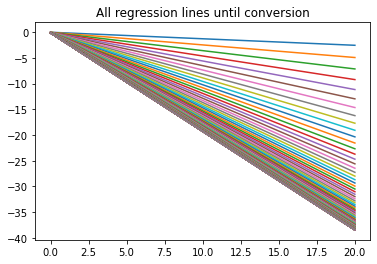

In [117]:
for v in range(no_of_epochs_mini-1):
    line_n = hypothesis_list_mini[v]
    plt.plot(X, line_n)
    
    
plt.title("All regression lines until conversion")
plt.show()

# Best fit

In [118]:
best_fit_mini = theta0_mini + theta1_mini *X

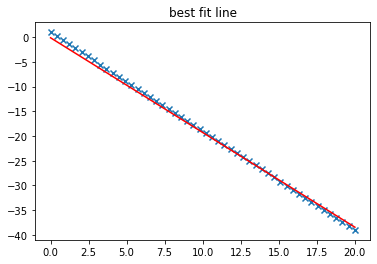

In [119]:
plt.plot(X, best_fit_2, c='red')
plt.scatter(X,y, marker= 'x')
plt.title('best fit line')
plt.show()

## Stochastic GD

#### Updating the implementation of the Batch GD to be Stochastic

In [120]:
import numpy as np
from numpy.linalg import norm
def stochastic(input_data_x, target_labels_y, learning_rate, max_no_of_iterations):
    
    theta0 = 0
    theta1 = 0
    theta0_list =[]
    theta1_list =[]
    hypothesis_list=[]
    losses = []
    cost_1= 1000
    m = len(input_data_x)
    actual_no_of_epochs = 1
    for i in range(max_no_of_iterations):
        
        for j in range(m):
    

            hypothesis = theta0 + theta1 * input_data_x[j]
            cost = (hypothesis - target_labels_y[j])**2
            gradient_0 = hypothesis - target_labels_y[j]
            gradient_1 = input_data_x[j]*(hypothesis - target_labels_y[j])
            theta0 = theta0 - learning_rate * gradient_0
            theta1 = theta1 - learning_rate * gradient_1
            gradient_vector = np.array([gradient_0, gradient_1])
            
            theta0_list.append(theta0)
            theta1_list.append(theta1)
            losses.append(cost)
        

        if norm(gradient_vector) <= 0.0001:
            break
        if abs(cost-cost_1) <= 0.0001:
            break
    
        cost_1 = cost
        actual_no_of_epochs += 1
        hypothesis = theta0 + theta1 * input_data_x
        hypothesis_list.append(hypothesis)
    
    return theta0_list, theta1_list, losses, hypothesis_list, theta0, theta1 ,actual_no_of_epochs


In [121]:
out_put_s = stochastic(X, y, 0.0001, 1000)
theta0_list_s = out_put_s[0]
theta1_list_s = out_put_s[1]
losses_s = out_put_s[2]
hypothesis_list_s = out_put_s[3]
theta0_s = out_put_s[4]
theta1_s = out_put_s[5]
no_of_epochs_s = out_put_s[6]
y_predicted_s = theta0_s + theta1_s * X
print(no_of_epochs_s)

673


# R2 Score

In [122]:
r2_s = r2_score(y,y_predicted_s)
print(r2_s)

0.999554853923954


# loss vs. iterations

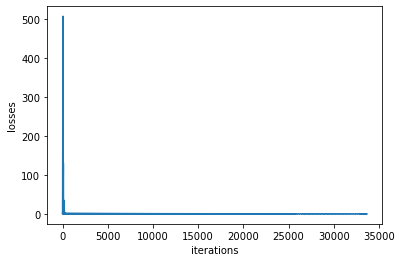

In [123]:
iter_s = np.arange(0, len(losses_s))
plt.plot(iter_s, losses_s)
plt.xlabel('iterations')
plt.ylabel('losses')
plt.show()


# Theta_0 vs. loss and Theta_1 vs. loss

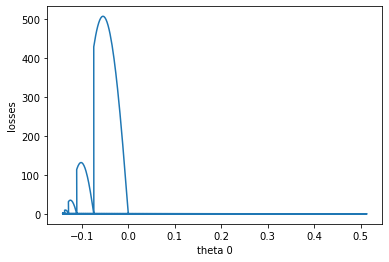

In [124]:
plt.plot(theta0_list_s, losses_s)
plt.xlabel("theta 0")
plt.ylabel("losses")
plt.show()

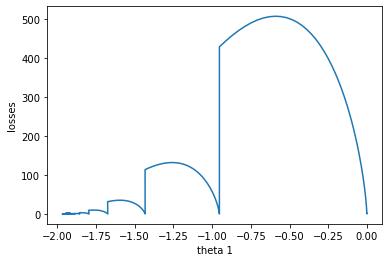

In [125]:
plt.plot(theta1_list_s, losses_s)
plt.xlabel("theta 1")
plt.ylabel("losses")
plt.show()

# All regression lines until conversion

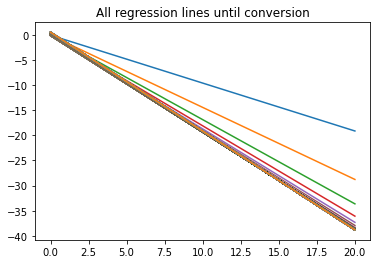

In [127]:
for s in range(no_of_epochs_s -1):
    line_s = hypothesis_list_s[s]
    plt.plot(X, line_s)
    
    
plt.title("All regression lines until conversion")
plt.show()

# Best fit

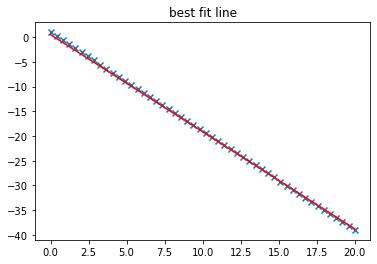

In [128]:
best_fit_s = theta0_s + theta1_s *X
plt.plot(X, best_fit_s, c='red')
plt.scatter(X,y, marker= 'x')
plt.title('best fit line')
plt.show()